In [128]:
# Центральный, Волго-Вятский, Центрально-Черноземный, Поволжский, Северо-Кавказский, Уральский,  Западно-Сибирский районы

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных
- Исходная таблица была "руками" очищена от ненужных строк

In [130]:
dataframe = pd.read_excel('ЛР1 ПАД_cleansed.xlsx')
X = dataframe.drop(dataframe.columns[[0, 1]], axis=1)
print(X)
Y = dataframe['Y']
Y

      х1    х2   х3   х4    х5   х6   x7    x8    x9
0    9.2  15.9  7.8  5.3  16.7  169  148  22.7  2094
1    7.6  16.4  6.7  4.7  15.5  144  150  27.9  1768
2    7.3  18.3  6.3  4.9  19.6  138  133  33.7  1982
3    7.9  16.4  6.8  5.0  17.6  197  155  26.6  1621
4    7.9  17.0  6.3  4.4  20.1  182  159  30.5  1631
5    8.0  16.9  8.2  4.6  15.5  520  197  19.1  1066
6    7.2  17.6  8.1  5.2  16.1  143  165  31.2  1183
7    8.7  16.0  7.6  4.4  18.9  214  161  22.7  1308
8    7.8  17.9  7.2  4.3  15.7  158  163  24.4  1475
9    8.0  16.9  6.9  4.7  16.8  185  146  19.8  2081
10   7.5  19.4  6.7  4.6  19.3  153  165  28.6  2109
11   7.3  19.4  7.4  5.0  20.1  200  175  16.2  1757
12   7.6  17.3  7.1  5.3  12.0  180  154  21.3  2111
13   9.6  13.0  6.4  3.5  16.8  120  117  43.2  2112
14   9.0  14.1  7.0  3.3  15.2  132  126  34.7  1794
15  10.2  13.0  7.1  3.2  16.1  145  121  27.3  1688
16   8.1  16.3  6.2  3.9  17.1  137  121  32.0  1774
17   8.0  17.5  6.7  4.0  16.4  181  182  22.0

0     60.1
1     58.5
2     57.4
3     58.5
4     58.3
5     58.2
6     56.5
7     59.2
8     58.1
9     58.8
10    56.5
11    57.1
12    58.3
13    59.4
14    61.2
15    60.4
16    58.6
17    57.5
18    61.9
19    61.0
20    60.2
21    59.5
22    59.3
23    59.8
24    60.2
25    60.0
26    60.7
27    60.9
28    59.1
29    60.3
30    60.7
31    60.6
32    65.9
33    62.6
34    63.9
35    59.5
36    59.4
37    61.0
38    59.4
39    60.2
40    57.5
41    68.9
42    59.0
43    56.9
44    57.7
45    58.0
46    55.1
47    58.3
48    55.4
49    59.1
50    60.6
51    58.2
52    57.8
Name: Y, dtype: float64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

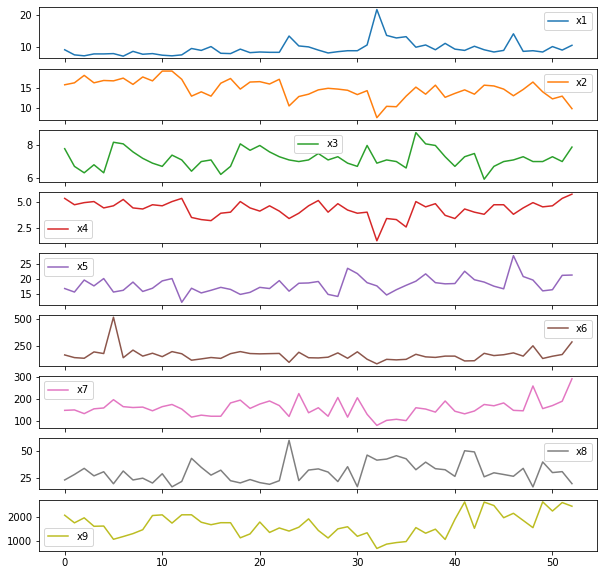

In [131]:
X.plot(subplots=True, figsize=(10, 10)) # Диапазон исходных входных данных

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

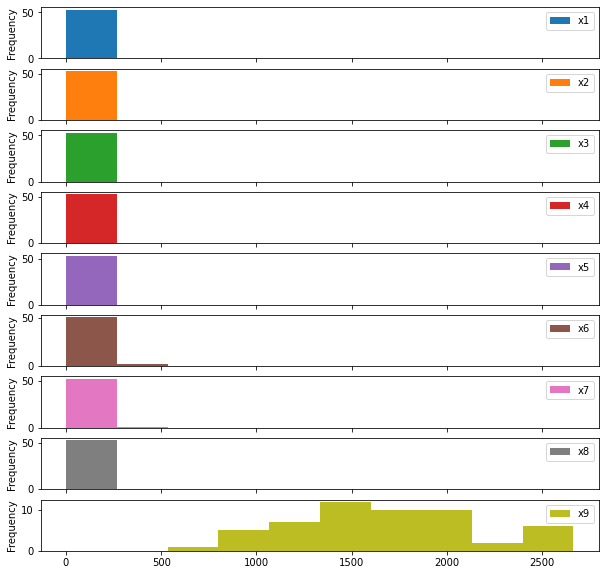

In [132]:
X.plot(kind='hist', subplots=True, figsize=(10, 10)) # Распределение исходных входных данных по частотному признаку

## Вариант Заданий 1-3 с l2 нормализацией
- Не является основным вариантом.

In [133]:
X_preproccessed = preprocessing.normalize(X, norm='l2')
X_preproccessed = pd.DataFrame(X_preproccessed)
X_preproccessed.insert(0, 'x0', 1)
X_preproccessed

,x0,0,1,2,3,4,5,6,7,8
0,1,0.004368,0.007549,0.003703,0.002516,0.007929,0.080235,0.070265,0.010777,0.994158
1,1,0.004268,0.009210,0.003763,0.002640,0.008705,0.080872,0.084242,0.015669,0.992934
2,1,0.003665,0.009188,0.003163,0.002460,0.009841,0.069286,0.066776,0.016920,0.995110
3,1,0.004815,0.009996,0.004145,0.003047,0.010727,0.120071,0.094472,0.016213,0.987993
4,1,0.004790,0.010307,0.003820,0.002668,0.012187,0.110347,0.096402,0.018492,0.988883
5,1,0.006651,0.014051,0.006818,0.003825,0.012887,0.432342,0.163791,0.015880,0.886302
6,1,0.005982,0.014622,0.006729,0.004320,0.013376,0.118802,0.137079,0.025920,0.982818
7,1,0.006514,0.011980,0.005690,0.003294,0.014151,0.160226,0.120544,0.016996,0.979326
8,1,0.005225,0.011991,0.004823,0.002880,0.010517,0.105841,0.109191,0.016345,0.988076
9,1,0.003819,0.008069,0.003294,0.002244,0.008021,0.088324,0.069704,0.009453,0.993525


In [134]:
X_preproccessed_transposed = np.transpose(X_preproccessed)
# first = np.linalg.inv(np.dot(X_preproccessed_transposed, X_preproccessed))
w = np.dot(np.dot(np.linalg.inv(np.dot(X_preproccessed_transposed, X_preproccessed)), X_preproccessed_transposed), Y)
w

array([ 185.55793173, -298.58464045, -544.30781267, 2899.63378245,
       -877.04883976,   28.12127392,  -45.51087188,  -20.06483891,
        -31.35271029, -124.71687183])

In [135]:
# Применим полученные веса к данным, получили "адекватные значения"
np.dot(X_preproccessed, w)

array([59.51122506, 58.41295742, 57.62270704, 57.23828099, 56.72982038,
       58.70326611, 60.36910649, 58.71875951, 58.47579825, 58.21145111,
       57.7812007 , 57.63975744, 58.16925526, 59.78180648, 60.32045016,
       60.6007826 , 58.21307789, 57.62303378, 60.253885  , 59.35725277,
       59.93091278, 59.21112768, 58.49002704, 61.33865702, 58.80884613,
       59.69295763, 59.82192996, 59.84716822, 58.62534157, 59.63575447,
       58.62060352, 61.52836463, 65.89677174, 62.15845551, 62.09771369,
       59.80231267, 61.13647482, 61.35560385, 60.47033494, 60.66705349,
       59.45474268, 60.39584572, 60.96792648, 57.77051792, 58.63430637,
       58.6364125 , 59.01951255, 59.63014899, 56.36763296, 59.74479519,
       59.90846259, 59.10617329, 58.69323692])

In [136]:
pd.DataFrame(X_preproccessed).corr()

,x0,0,1,2,3,4,5,6,7,8
x0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,1.000000,0.375874,0.817166,0.196516,0.837770,0.236992,0.324910,0.847179,-0.186310
1,NaN,0.375874,1.000000,0.771344,0.821775,0.622323,0.624656,0.683827,0.373646,-0.527357
2,NaN,0.817166,0.771344,1.000000,0.688514,0.871339,0.547859,0.659007,0.758990,-0.468042
3,NaN,0.196516,0.821775,0.688514,1.000000,0.473834,0.606950,0.758632,0.261655,-0.521534
4,NaN,0.837770,0.622323,0.871339,0.473834,1.000000,0.400576,0.554777,0.751085,-0.321689
5,NaN,0.236992,0.624656,0.547859,0.606950,0.400576,1.000000,0.718895,0.086547,-0.979074
6,NaN,0.324910,0.683827,0.659007,0.758632,0.554777,0.718895,1.000000,0.154917,-0.658564
7,NaN,0.847179,0.373646,0.758990,0.261655,0.751085,0.086547,0.154917,1.000000,-0.059089
8,NaN,-0.186310,-0.527357,-0.468042,-0.521534,-0.321689,-0.979074,-0.658564,-0.059089,1.000000


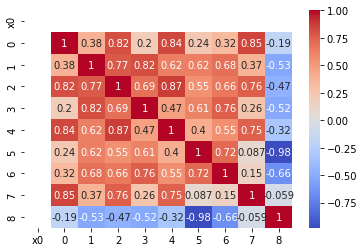

In [137]:
# Условность, как читать в верхнем теругольнике: строка * пересечение = столбец
df_plot = sns.heatmap(pd.DataFrame(X_preproccessed).corr(), cmap="coolwarm", annot=True)

# Вариант с z-нормализацией
-  Является основным вариантом решения

## Задание 1 -- нормирование данных

In [138]:
# X_preproccessed_z = (np.array(X) - np.mean(np.array(X))) / np.std(np.array(X))
# X_preproccessed_z
X_preproccessed_z = X
for column in X.columns:
    X_preproccessed_z[column] = (X[column] - X[column].mean()) / X[column].std()
X_preproccessed_z

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,-0.150326,0.452477,1.049835,1.320080,-0.478741,0.000000,-0.272793,-0.762195,0.828080
1,-0.817743,0.658502,-0.862833,0.539810,-0.918105,-0.411745,-0.220314,-0.231872,0.165171
2,-0.942884,1.441396,-1.558349,0.799900,0.583056,-0.510564,-0.666387,0.359642,0.600332
3,-0.692603,0.658502,-0.688954,0.929945,-0.149218,0.461154,-0.089116,-0.364453,-0.133748
4,-0.692603,0.905732,-1.558349,0.149674,0.766124,0.214107,0.015843,0.033290,-0.113414
5,-0.650889,0.864527,1.745351,0.409765,-0.918105,5.780900,1.012948,-1.129342,-1.262321
6,-0.984598,1.152962,1.571472,1.190035,-0.698423,-0.428215,0.173280,0.104679,-1.024406
7,-0.358894,0.493682,0.702077,0.149674,0.326760,0.741141,0.068322,-0.762195,-0.770223
8,-0.734316,1.276577,0.006561,0.019629,-0.844878,-0.181168,0.120801,-0.588821,-0.430634
9,-0.650889,0.864527,-0.515075,0.539810,-0.442128,0.263517,-0.325272,-1.057953,0.801645


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

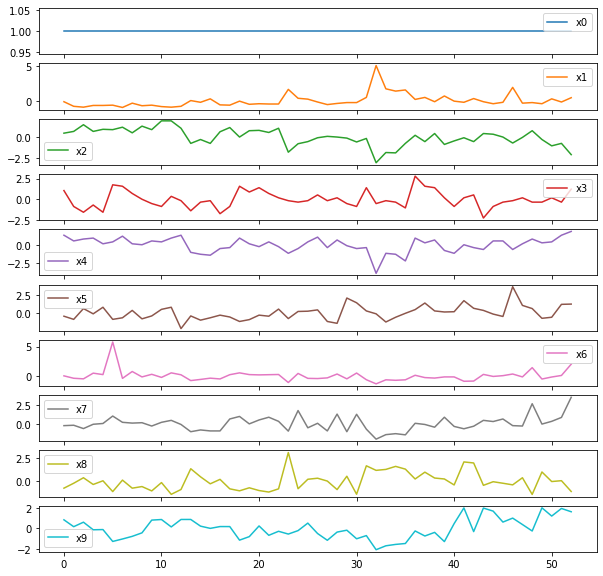

In [139]:
X_preproccessed_z.insert(0, 'x0', 1)
pd.DataFrame(X_preproccessed_z).plot(subplots=True, figsize=(10, 10)) # Исследуем данные, видиим, что нормированные графики не изменили свой вид по сравнению с исходными

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

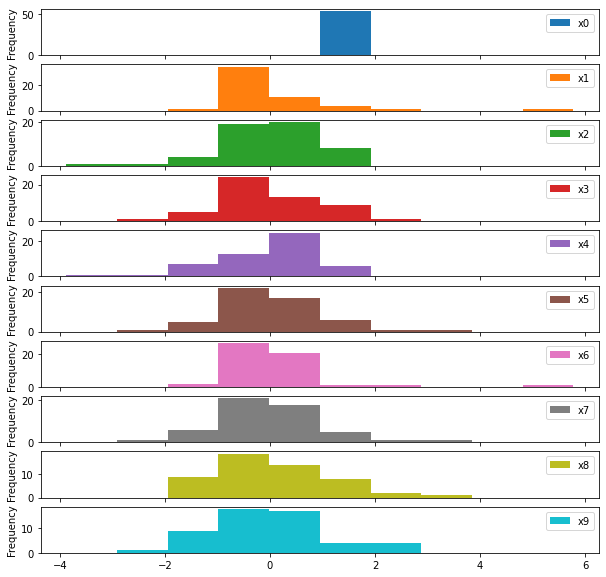

In [140]:
X_preproccessed_z.plot(kind='hist', subplots=True, figsize=(10, 10)) # Убедились, что величины отнормированы

## Задание 2 -- рассчет весов линейной регрессии по аналитической формуле

In [141]:
X_preproccessed_transposed_z = np.transpose(X_preproccessed_z)
w = np.dot(np.dot(np.linalg.inv(np.dot(X_preproccessed_transposed_z, X_preproccessed_z)), X_preproccessed_transposed_z),
           Y)
w

array([ 5.94566038e+01, -7.06613289e-01, -1.22815456e+00,  7.99704137e-01,
       -5.76838142e-01, -1.33507944e-01, -3.19175780e-01, -6.18303598e-01,
        2.84324091e-03, -6.75282336e-02])

In [142]:
Y_pred_by_x_z = np.dot(X_preproccessed_z,
                       w)  # Перемножим полученные веса на z-нормализаванные данные, получим предсказанные значения
Y_pred_by_x_z

array([59.25969812, 58.60269697, 57.1025995 , 57.98570517, 57.32840736,
       57.74732777, 59.49882857, 59.30642288, 58.52490864, 58.25036194,
       56.66595959, 56.9945383 , 58.12129435, 60.77202861, 61.28686998,
       61.6850971 , 58.84023514, 57.69317249, 59.70372456, 59.66584089,
       59.73607622, 58.98045109, 58.50406573, 62.14175659, 58.96358251,
       60.00711925, 59.60754831, 60.79372752, 58.82753872, 60.03027643,
       58.91304291, 61.34432554, 63.25819794, 62.41326319, 62.48467611,
       60.96030017, 60.67011199, 60.91275116, 60.20149623, 60.2214797 ,
       60.27498225, 60.22728811, 60.97855479, 57.09307732, 58.13521757,
       58.6719496 , 58.69715801, 59.91789035, 55.84685347, 59.87397818,
       60.31976429, 58.64993196, 58.50584892])

## Задание 3 -- построение и интерпретиация корреляционной матрицы. Определние числа обусловленности

In [143]:
pd.DataFrame(X_preproccessed_z).corr() # Стандартная корреляионная матрица

,x0,х1,х2,х3,х4,х5,х6,x7,x8,x9
x0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
х1,NaN,1.000000,-0.817577,-0.005690,-0.708038,0.130395,-0.289246,-0.370477,0.470179,-0.364186
х2,NaN,-0.817577,1.000000,0.002485,0.538133,-0.084546,0.261406,0.197748,-0.503458,0.186819
х3,NaN,-0.005690,0.002485,1.000000,0.359488,-0.032915,0.292268,0.235653,-0.085376,-0.282762
х4,NaN,-0.708038,0.538133,0.359488,1.000000,0.036773,0.373047,0.581485,-0.450832,0.406535
х5,NaN,0.130395,-0.084546,-0.032915,0.036773,1.000000,-0.004476,0.123572,0.058539,0.248865
х6,NaN,-0.289246,0.261406,0.292268,0.373047,-0.004476,1.000000,0.611724,-0.598388,-0.022989
x7,NaN,-0.370477,0.197748,0.235653,0.581485,0.123572,0.611724,1.000000,-0.659593,0.226936
x8,NaN,0.470179,-0.503458,-0.085376,-0.450832,0.058539,-0.598388,-0.659593,1.000000,-0.100035
x9,NaN,-0.364186,0.186819,-0.282762,0.406535,0.248865,-0.022989,0.226936,-0.100035,1.000000


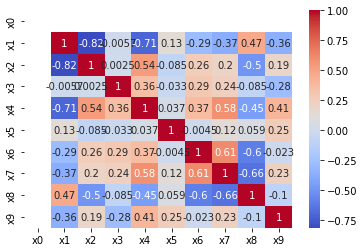

In [144]:
df_plot = sns.heatmap(pd.DataFrame(X_preproccessed_z).corr(), cmap="coolwarm", annot=True) # Вариант интерпретации корреляционной матрицы - тепловая карта

**Применим p=2 - l2 нормализация данных X. Numpy по умолчанию применяет нормализацию при вычислении числа обусловленности. Т.к. нельзя отменить нормализацию, применим l2. Аналогичный метод библиотеки scipy применяет нормализацию Фробениуса (????), поэтому от его не применяем.**

In [145]:
print("Число обусловленности:\t", np.linalg.cond(X, p=2))

Число обусловленности:	 5.8336907578659085


**Число обусловленности = 5,83, что свидетельствует о слабой мультиколлинеарности в данных (слабая мультиколлинеарность при [1..10])**

## Задание 4 -- анализ регрессионных остатков

In [146]:
print(Y - Y_pred_by_x_z) # Все регрессионные остатки для модели, веса которой были получены аналитически
mse = mean_squared_error(Y, Y_pred_by_x_z)
print('Среднеквадратическая ошибка:\t', mse)
print('RMSE (root mean square error):\t', mse ** 0.5)
print('R2:', r2_score(y_true=Y, y_pred=Y_pred_by_x_z))  # R2 метрика для модели, полученной аналитически, 9 задание

0     0.840302
1    -0.102697
2     0.297401
3     0.514295
4     0.971593
5     0.452672
6    -2.998829
7    -0.106423
8    -0.424909
9     0.549638
10   -0.165960
11    0.105462
12    0.178706
13   -1.372029
14   -0.086870
15   -1.285097
16   -0.240235
17   -0.193172
18    2.196275
19    1.334159
20    0.463924
21    0.519549
22    0.795934
23   -2.341757
24    1.236417
25   -0.007119
26    1.092452
27    0.106272
28    0.272461
29    0.269724
30    1.786957
31   -0.744326
32    2.641802
33    0.186737
34    1.415324
35   -1.460300
36   -1.270112
37    0.087249
38   -0.801496
39   -0.021480
40   -2.774982
41    8.672712
42   -1.978555
43   -0.193077
44   -0.435218
45   -0.671950
46   -3.597158
47   -1.617890
48   -0.446853
49   -0.773978
50    0.280236
51   -0.449932
52   -0.705849
Name: Y, dtype: float64
Среднеквадратическая ошибка:	 2.8925291537944653
RMSE (root mean square error):	 1.700743706086977
R2: 0.45903545261892087


## Задание 5 -- Определение весов линейной регрессии градиентным методом

In [147]:
w = np.array([1] * len(X.columns))
n = len(X)
learning_rate = 0.1
for iteration in range(1, 300):
    # шаг 2 - считаем y^
    y_iter_pred = np.dot(np.array(X_preproccessed_z), w)
    # шаг 3 - рассчет MSE и grad
    mse = mean_squared_error(Y, pd.DataFrame(y_iter_pred))
    dS_dw = (-2 / n) * (np.dot((np.array(Y) - np.array(y_iter_pred)), np.array(X_preproccessed_z)))

    # шаг 4 - новые веса
    w = w - learning_rate * dS_dw

    # Фиксируем номер итерацию и MSE на ней
    print(f"Iter No. {iteration}, \tMSE: {mse}")
Y_pred_by_x_z_by_grad = np.dot(X_preproccessed_z, w) # Значения предсказанные согласно весам, полученным градиентным методом
print("Вычисленные веса:", w)

Iter No. 1, 	MSE: 3435.8683980126452
Iter No. 2, 	MSE: 2194.409513546002
Iter No. 3, 	MSE: 1405.2737806689863
Iter No. 4, 	MSE: 900.6971944356409
Iter No. 5, 	MSE: 577.8158262270691
Iter No. 6, 	MSE: 371.1733138632996
Iter No. 7, 	MSE: 238.91395353955588
Iter No. 8, 	MSE: 154.25620532498317
Iter No. 9, 	MSE: 100.06208449084777
Iter No. 10, 	MSE: 65.36436159681234
Iter No. 11, 	MSE: 43.14455849607384
Iter No. 12, 	MSE: 28.911114323735127
Iter No. 13, 	MSE: 19.789543130459645
Iter No. 14, 	MSE: 13.940206741330819
Iter No. 15, 	MSE: 10.18572877656461
Iter No. 16, 	MSE: 7.772560981071992
Iter No. 17, 	MSE: 6.218397071511406
Iter No. 18, 	MSE: 5.214523524544697
Iter No. 19, 	MSE: 4.5633270292399075
Iter No. 20, 	MSE: 4.138300604086623
Iter No. 21, 	MSE: 3.8584480167621726
Iter No. 22, 	MSE: 3.6719026887436716
Iter No. 23, 	MSE: 3.545443664605128
Iter No. 24, 	MSE: 3.45778561557617
Iter No. 25, 	MSE: 3.3952841990616833
Iter No. 26, 	MSE: 3.349187250156402
Iter No. 27, 	MSE: 3.313875323419245

# Задание 6 -- Сравнение результатаов по аналитечскому и градиентному методу

**Построим графики распределения исхолных целевых(target) значений и предсказанных моделями, построенными аналитическим и градиентным методом**

<AxesSubplot:>

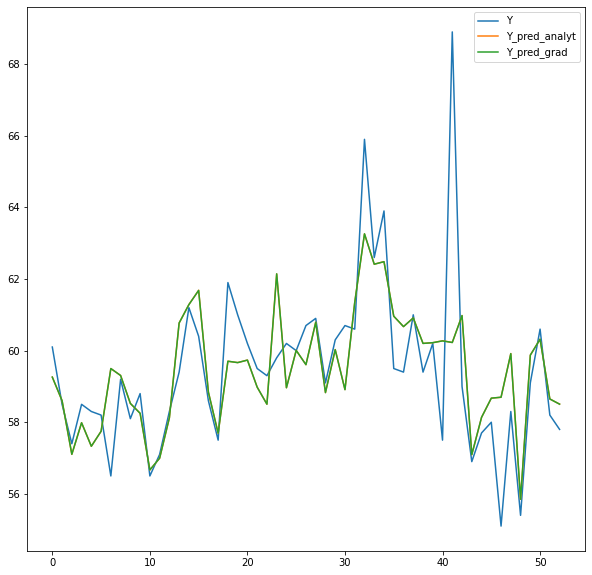

In [148]:
pd.DataFrame({"Y":Y, "Y_pred_analyt":Y_pred_by_x_z, "Y_pred_grad":Y_pred_by_x_z_by_grad}).plot(figsize=(10,10))

**Графики по аналитическому и градиентму методу наложились друг на друга, убедимся в этом, построив каждый из графиков выше в своей системе координат**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

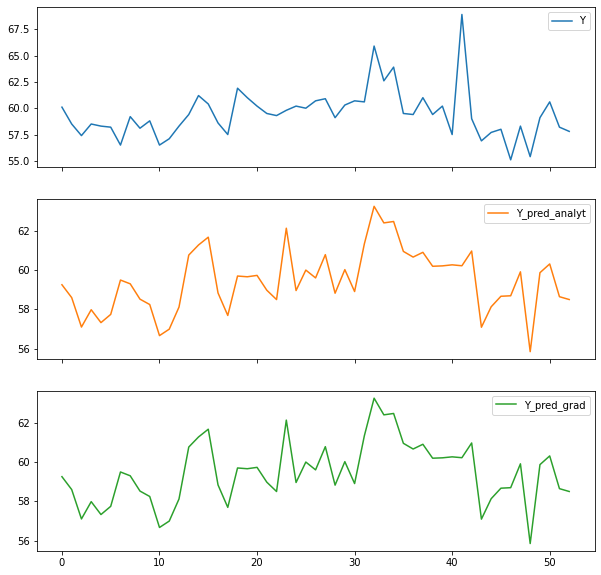

In [149]:
pd.DataFrame({"Y":Y, "Y_pred_analyt":Y_pred_by_x_z, "Y_pred_grad":Y_pred_by_x_z_by_grad}).plot(subplots=True,figsize=(10,10)) # Построение на одном графике исходных целевых (target) значений и предсказанных по градиентному методу

**Сравним метрики MSE/RMSE/R2 для аналитического и градиентного методов**

In [150]:
print('Итоговое MSE по градлиентному методу:\t', mse)
print('Итоговое RMSE по градиентному методу:\t', mse ** 0.5)
print('R2:\t',
      r2_score(y_true=Y, y_pred=Y_pred_by_x_z_by_grad))  # R2 метрика для модели, полученной градиентным методом, 9 задание
# Данные MSE/RMSE для аналитического веса (посчитаны выше)
# Среднеквадратическая ошибка: 2.8925291537944653
# RMSE (root mean square error): 1.700743706086977
# R2: 0.45903545261892087

Итоговое MSE по градлиентному методу:	 2.8925328438878584
Итоговое RMSE по градиентному методу:	 1.7007447909336246
R2:	 0.4590347911843341


## Задание 7 -- Fit-predict модели линейной регрессии методами библиотеки sklearn

In [151]:
reg = LinearRegression().fit(X, Y)
print("Веса модели из sklearn:", reg.coef_)
# Предскажем Y на исходных данных (на тех же, на которых обучались)
Y_pred_sklearn = reg.predict(X)
mse = mean_squared_error(Y, Y_pred_sklearn)
# Сравним результаты с ранее полученными
print("MSE модели из sklearn:\t", mse)
print("RMSE модели из sklearn:\t", mse ** 0.5)
print("R2 модели из sklearn:\t", reg.score(X, Y))  # для задания 9

Веса модели из sklearn: [ 0.         -0.70661329 -1.22815456  0.79970414 -0.57683814 -0.13350794
 -0.31917578 -0.6183036   0.00284324 -0.06752823]
MSE модели из sklearn:	 2.892529153794465
RMSE модели из sklearn:	 1.7007437060869768
R2 модели из sklearn:	 0.459035452618921


## Задание 8 - С помощью библиотеки statmodels получить "эконометрический" результат обучения модели линейной регрессии

In [152]:
import statsmodels.api as sm

results = sm.OLS(Y, X).fit()
print(results.summary())  # РАСШИФРОВАТЬ КАЖДУЮ БУКВУ

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     4.054
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           0.000812
Time:                        09:45:28   Log-Likelihood:                -103.35
No. Observations:                  53   AIC:                             226.7
Df Residuals:                      43   BIC:                             246.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            59.4566      0.259    229.243      0.0